# Extract and analyse data in Python with BeautifulSoup, Pandas and MatPlotLib (Web Scrapping of the website https://www.jesusgarcia.pro)

In [2]:
#Import libraries
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

#Get all Website content using BeautifulSoup
site= "https://www.jesusgarcia.pro"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page)
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Jesus Garcia Garcia. Computer Engineer focused on Information Systems and Software Engineering with a great interest around Big Data, BI and Data Science" name="description"/>
<meta content="JG Design" name="author"/>
<meta content="jesus,garcia,jesus garcia, big data engineer, engineer, analyst,security, bpm, data analysis, data scientist, business intelligence, data science" name="keywords"/>
<script src="/cdn-cgi/apps/head/tA1n6qNW5H1_z6vc4ThtsiZBC1k.js"></script><link href="https://www.jesusgarcia.pro/" hreflang="en" rel="alternate"/>
<title>Jesus Garcia Garcia - IT Professional</title>
<link href="css/font-face.css" media="all" rel="stylesheet"/>
<link href="vendor/font-awesome/css/font-awesome.min.css" media="all" rel="stylesheet"/>
<link href="vendor/linearicons-free/css/linearicons-free.css" media="all" rel="style

In [3]:
#Get & Print all links of the Website
for link in soup.find_all('a'):
    print(link.get('href'))

index.html
#intro
#services
#resume
#projects
#testimonials
#contact
#
https://www.jesusgarcia.pro/ar
https://www.jesusgarcia.pro/zh
https://www.jesusgarcia.pro/de
https://www.jesusgarcia.pro/es
https://www.jesusgarcia.pro/fr
https://www.jesusgarcia.pro/ru
index.html
#intro
#services
#resume
#projects
#testimonials
#contact
#
https://www.jesusgarcia.pro/ar
https://www.jesusgarcia.pro/zh
https://www.jesusgarcia.pro/de
https://www.jesusgarcia.pro/es
https://www.jesusgarcia.pro/fr
https://www.jesusgarcia.pro/ru
#
#
#
#
#
#
#experience
#education
#skills
#
https://www.quistor.com/
#
https://universidadeuropea.es/
#
https://www.atmira.com/
#
https://www.viewnext.com/
JesusGarciaGarcia_Resume2019.pdf
#
https://universidadeuropea.es/
https://eburnout.jesusgarcia.pro
#
https://www.uah.es/
JesusGarciaGarcia_Resume2019.pdf
JesusGarciaGarcia_Resume2019.pdf
https://www.red.es
#
http://www.seg-social.es/wps/portal/wss/internet/
#
#
https://www.bancopopular.es/
#
https://eburnout.com/
#
https://www.

In [4]:
#Get & Extract Resume - TimeLine
p_heading1 = soup.find_all('span', {'class': 'resume-timeline'})
print(p_heading1)

[<span class="resume-timeline">Nov 2018 – PRESENT</span>, <span class="resume-timeline">Mar 2018 – Jul 2018</span>, <span class="resume-timeline">Jun 2017 – Mar 2018</span>, <span class="resume-timeline">Oct 2016 – Jun 2017</span>, <span class="resume-timeline">Oct 2017 – Sept 2018</span>, <span class="resume-timeline">Sep 2012 – Jun 2016</span>]


In [5]:
type(p_heading1)

bs4.element.ResultSet

In [6]:
#Create a new Pandas df and put data extracted previously using BeautifulSoup
import pandas as pd
df = pd.DataFrame(p_heading1)

In [7]:
df.head()

,0
0,"<span class=""resume-timeline"">Nov 2018 – PRESE..."
1,"<span class=""resume-timeline"">Mar 2018 – Jul 2..."
2,"<span class=""resume-timeline"">Jun 2017 – Mar 2..."
3,"<span class=""resume-timeline"">Oct 2016 – Jun 2..."
4,"<span class=""resume-timeline"">Oct 2017 – Sept ..."


In [8]:
#Assign new name to column
df.columns = ['experiencia']

In [9]:
df.head()

,experiencia
0,"<span class=""resume-timeline"">Nov 2018 – PRESE..."
1,"<span class=""resume-timeline"">Mar 2018 – Jul 2..."
2,"<span class=""resume-timeline"">Jun 2017 – Mar 2..."
3,"<span class=""resume-timeline"">Oct 2016 – Jun 2..."
4,"<span class=""resume-timeline"">Oct 2017 – Sept ..."


In [10]:
#Remove non useful string in the Dataframe and replace PRESENT for current date
import datetime

#Function to return the name of the month
def number_mes (parametro):
  switcher = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    }    
  return switcher.get(parametro,'Unknown') #If month doesn´t match then return 0


dt = datetime.datetime.today()
current_date = number_mes(dt.month) + ' ' + str(dt.year)
#Delete non useful data from the rows
df['experiencia'] = df['experiencia'].astype(str).str.replace('<span class="resume-timeline">','')
df['experiencia'] = df['experiencia'].astype(str).str.replace('</span>','')
#Delete not useful rows from 'Oct 2017 – Sept 2018' to the end
row = df[df['experiencia'] == 'Sep 2012 – Jun 2016'].index.tolist()[0]
df = df.iloc[:row-1]

#Replace Present date
df['experiencia'] = df['experiencia'].astype(str).str.replace('PRESENT',str(current_date))

In [11]:
df.head(10)

,experiencia
0,Nov 2018 – Apr 2019
1,Mar 2018 – Jul 2018
2,Jun 2017 – Mar 2018
3,Oct 2016 – Jun 2017


In [12]:
from datetime import datetime


#Function to return the number of the month
def mes_number (parametro):
  switcher = {
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }    
  return switcher.get(parametro,0) #If month doesn´t match then return 0
 
#Function to return the number of days between two dates
def diferencia_dia (d1,d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

#Function to return the number of months between two dates
def diferencia_mes (d1,d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d1.year - d2.year) * 12 + d1.month - d2.month)

#Define new data columns to apply data transformations
df['split_cadena'] = df['experiencia'].str.split()
df['mes_inicio'] = df['split_cadena'].str[0]
df['mes_fin'] = df['split_cadena'].str[3]
df['mes_inicio_num'] = df['mes_inicio'].apply(mes_number)
df['mes_fin_num'] = df['mes_fin'].apply(mes_number)
df['anio_inicio'] = df['split_cadena'].str[1]
df['anio_fin'] = df['split_cadena'].str[4]
df['anio_mes_inicio'] = df['anio_inicio'].astype(str) + '-' + df['mes_inicio_num'].astype(str) + '-' + '1'
df['anio_mes_fin'] = df['anio_fin'].astype(str) + '-' + df['mes_fin_num'].astype(str) + '-' + '1'
df['experiencia_count_days'] = df.apply(lambda x: diferencia_dia(x['anio_mes_inicio'], x['anio_mes_fin']), axis=1)
df['experiencia_count_months'] = df.apply(lambda x: diferencia_mes(x['anio_mes_inicio'], x['anio_mes_fin']), axis=1)

In [13]:
df.head()

,experiencia,split_cadena,mes_inicio,mes_fin,mes_inicio_num,mes_fin_num,anio_inicio,anio_fin,anio_mes_inicio,anio_mes_fin,experiencia_count_days,experiencia_count_months
0,Nov 2018 – Apr 2019,"[Nov, 2018, –, Apr, 2019]",Nov,Apr,11,4,2018,2019,2018-11-1,2019-4-1,151,5
1,Mar 2018 – Jul 2018,"[Mar, 2018, –, Jul, 2018]",Mar,Jul,3,7,2018,2018,2018-3-1,2018-7-1,122,4
2,Jun 2017 – Mar 2018,"[Jun, 2017, –, Mar, 2018]",Jun,Mar,6,3,2017,2018,2017-6-1,2018-3-1,273,9
3,Oct 2016 – Jun 2017,"[Oct, 2016, –, Jun, 2017]",Oct,Jun,10,6,2016,2017,2016-10-1,2017-6-1,243,8


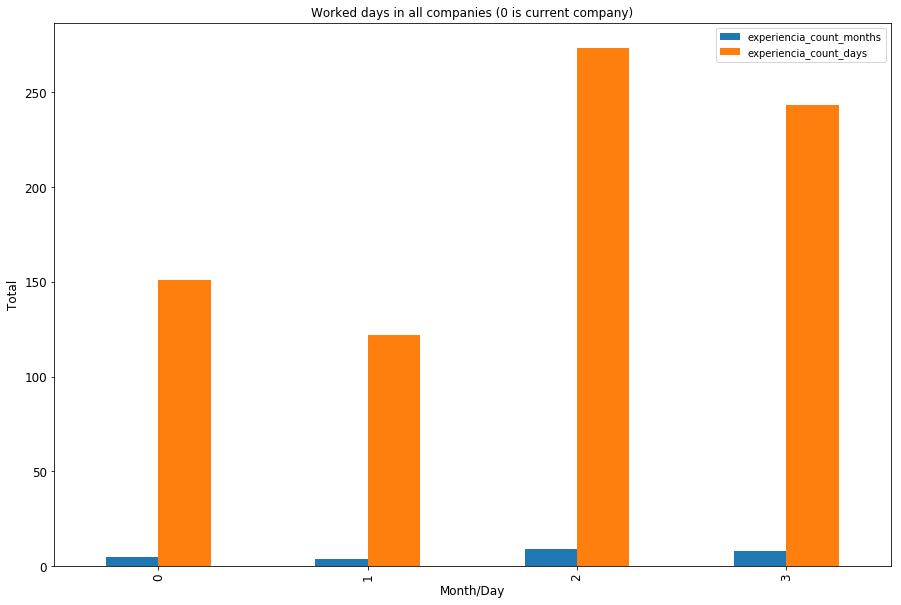

In [15]:
#Plot work experience between months and days in different companies
import matplotlib.pyplot as plt
ax = df[['experiencia_count_months','experiencia_count_days']].plot(kind='bar', title ="Worked days in all companies (0 is current company)", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Month/Day", fontsize=12)
ax.set_ylabel("Total", fontsize=12)
plt.show()